###  Dowloading the data

In [13]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np

DOWNLOAD_ROOT = 'https://github.com/ageron/handson-ml2/raw/master/'
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [2]:
# fetch_housing_data()

In [73]:
housing = load_housing_data()

### Taking a Quick Look at the Data Structure 

In [4]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


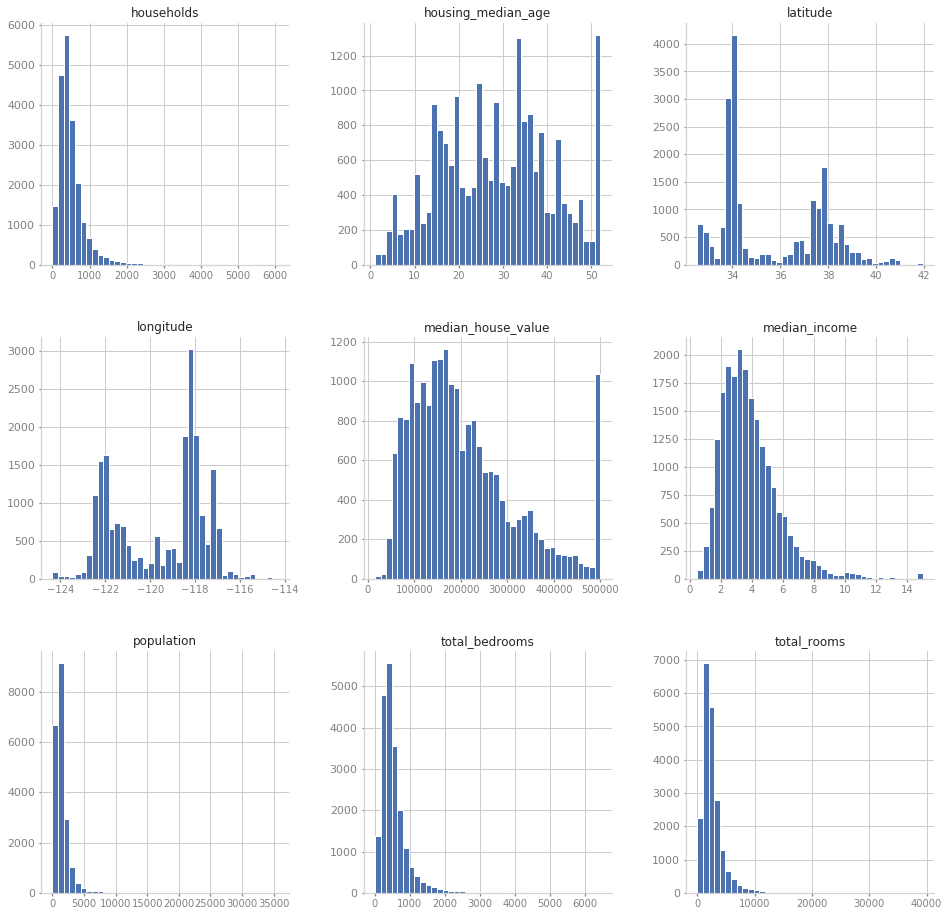

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

rc = {
    'axes.grid': False,
    'axes.edgecolor': 'lightgrey',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'xtick.color': 'grey',
    'xtick.labelsize': 'small',
    'xtick.bottom': True,
    'xtick.major.size': 2.5,
    'ytick.color': 'grey',
    'ytick.major.size': 2.5,
    'ytick.left': True,
}

sns.set(style='whitegrid', rc=rc)

housing.hist(bins=40, figsize=(16,16))
plt.show()

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### Investigating capped values

In [7]:
def print_rightmost_bins(col, bins=200, bins_at_edge=3):
    hist, edges = np.histogram(col, bins=bins)
    print(f'Rightmost bins of {col.name}')
    for bin_, edge in list(zip(hist, edges[1:]))[-bins_at_edge:]:  # print x rightmost bin counts
        print(bin_, edge)

In [8]:
print_rightmost_bins(housing['housing_median_age'])

Rightmost bins of housing_median_age
0 51.49
0 51.745
1273 52.0


In [9]:
print_rightmost_bins(housing['median_house_value'])

Rightmost bins of median_house_value
9 495150.98000000004
12 497575.99000000005
999 500001.0


In [10]:
print_rightmost_bins(housing['median_income'])

Rightmost bins of median_income
0 14.855098
1 14.927598999999999
51 15.0001


In [11]:
def is_capped(col, tolerance=1e-6):
    return np.abs(col - np.max(col)) < 1e-6
                 
for col in ['housing_median_age', 'median_house_value', 'median_income']:
    housing = housing[~is_capped(housing[col])]

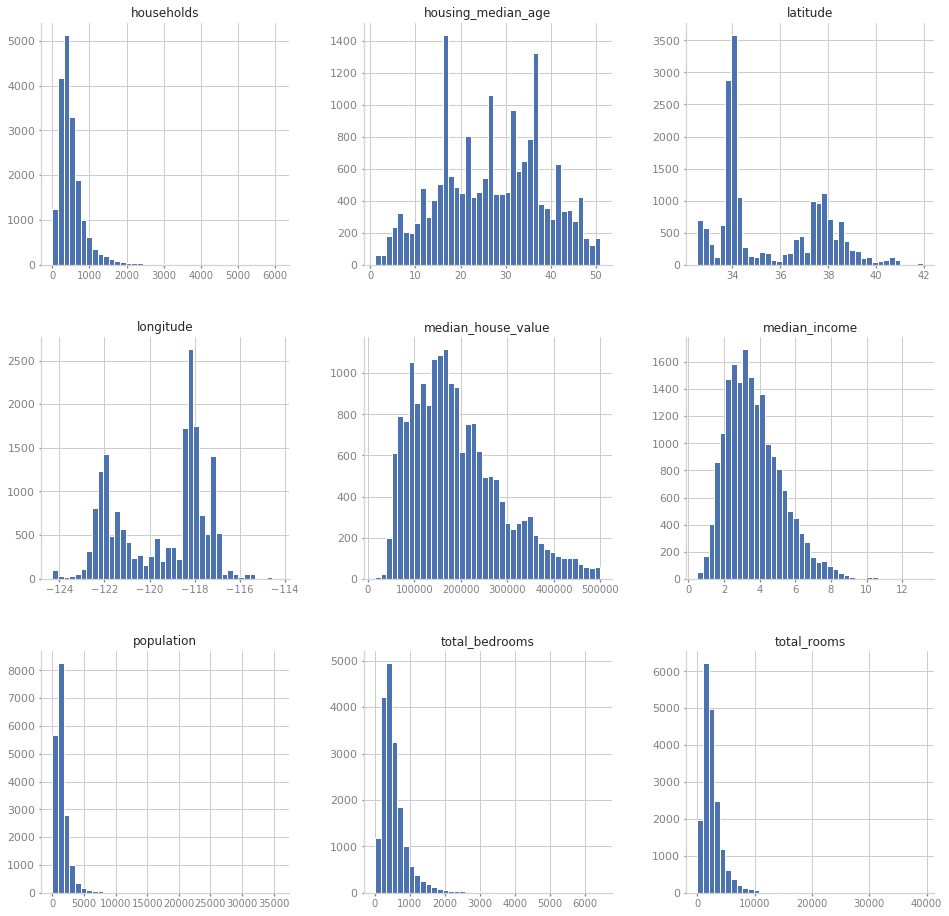

In [12]:
housing.hist(bins=40, figsize=(16,16))
plt.show()

In [13]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18570.000000,18570.000000,18570.000000,18570.000000,18377.000000,18570.000000,18570.000000,18570.000000,18570.000000
mean,-119.484663,35.593033,26.985245,2669.114970,548.062252,1470.549058,508.775444,3.692044,189587.641195
std,1.980805,2.147740,11.430958,2223.792693,429.418391,1162.909643,389.553371,1.565738,95775.718356
min,-124.300000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.550000,33.920000,17.000000,1455.000000,300.000000,811.000000,284.000000,2.537225,115400.000000
50%,-118.450000,34.240000,27.000000,2142.000000,442.000000,1203.000000,416.000000,3.467750,171200.000000
75%,-117.970000,37.670000,36.000000,3184.000000,659.000000,1781.000000,614.000000,4.615300,243200.000000
max,-114.310000,41.950000,51.000000,39320.000000,6445.000000,35682.000000,6082.000000,13.147700,500000.000000


### Creating a Test Set

#### Determinining strata for stratified sampling

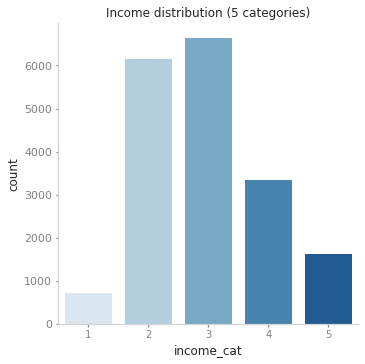

In [14]:
bins = [0., 1.5, 3.0, 4.5, 6., np.inf]
housing['income_cat'] = pd.cut(housing['median_income'], 
                               bins=bins, 
                               labels=np.arange(5)+1)

sns.catplot(x='income_cat', kind='count', data=housing, palette='Blues') \
   .set(title='Income distribution (5 categories)')

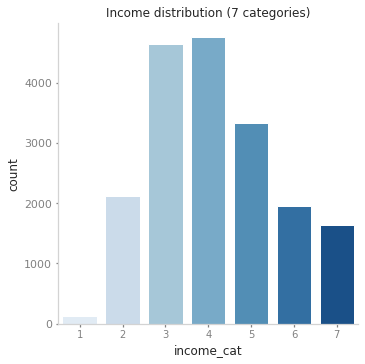

In [15]:
bins = [0., 1., 2., 3., 4., 5., 6., np.inf]
labels = np.arange(7)+1

housing['income_cat'] = pd.cut(housing['median_income'], 
                               bins=bins, 
                               labels=labels)

sns.catplot(x='income_cat', kind='count', data=housing, palette='Blues') \
   .set(title='Income distribution (7 categories)')

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_ix, test_ix in split.split(housing, housing['income_cat']):
    stratified_train_set = housing.iloc[train_ix].drop('income_cat', axis=1)
    stratified_test_set = housing.iloc[test_ix].drop('income_cat', axis=1)

def save_test_train_sets(data, dataset_name, dataset_path=HOUSING_PATH):
    csv_path = os.path.join(dataset_path, dataset_name)
    data.to_csv(csv_path)

save_test_train_sets(stratified_train_set, 'housing_train.csv')
save_test_train_sets(stratified_test_set, 'housing_test.csv')

housing = stratified_train_set.copy()
housing_test = stratified_test_set.copy()

### Visualizing the Data

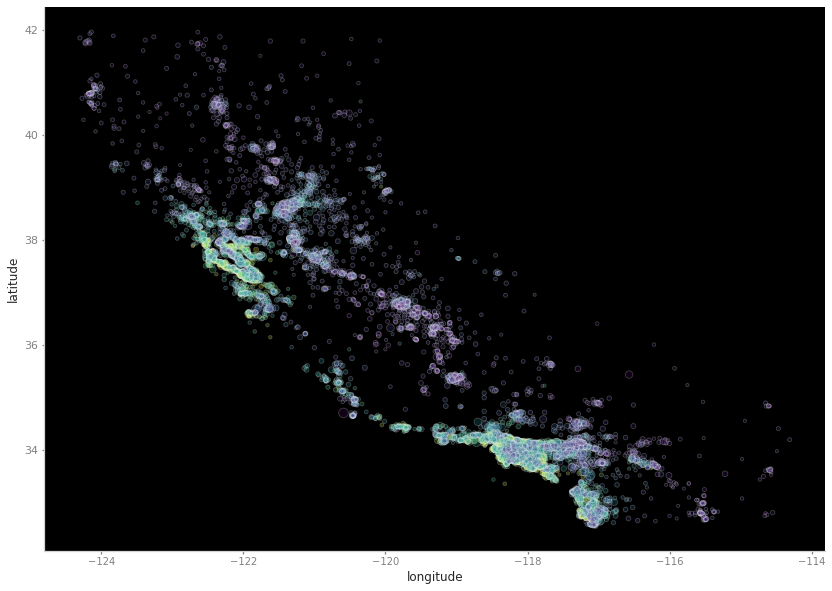

In [17]:
fig = plt.figure(figsize=(14,10))
ax = sns.scatterplot(x='longitude', y='latitude', size='population', hue='median_house_value', 
                     data=housing, sizes=(10, 200), alpha=0.25, palette='viridis', legend=False) \
        .set(facecolor='black')
plt.show()

### Looking for Correlations

In [18]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.665502
total_rooms           0.155343
households            0.101494
total_bedrooms        0.080235
population            0.023737
housing_median_age    0.016297
longitude            -0.029860
latitude             -0.165006
Name: median_house_value, dtype: float64

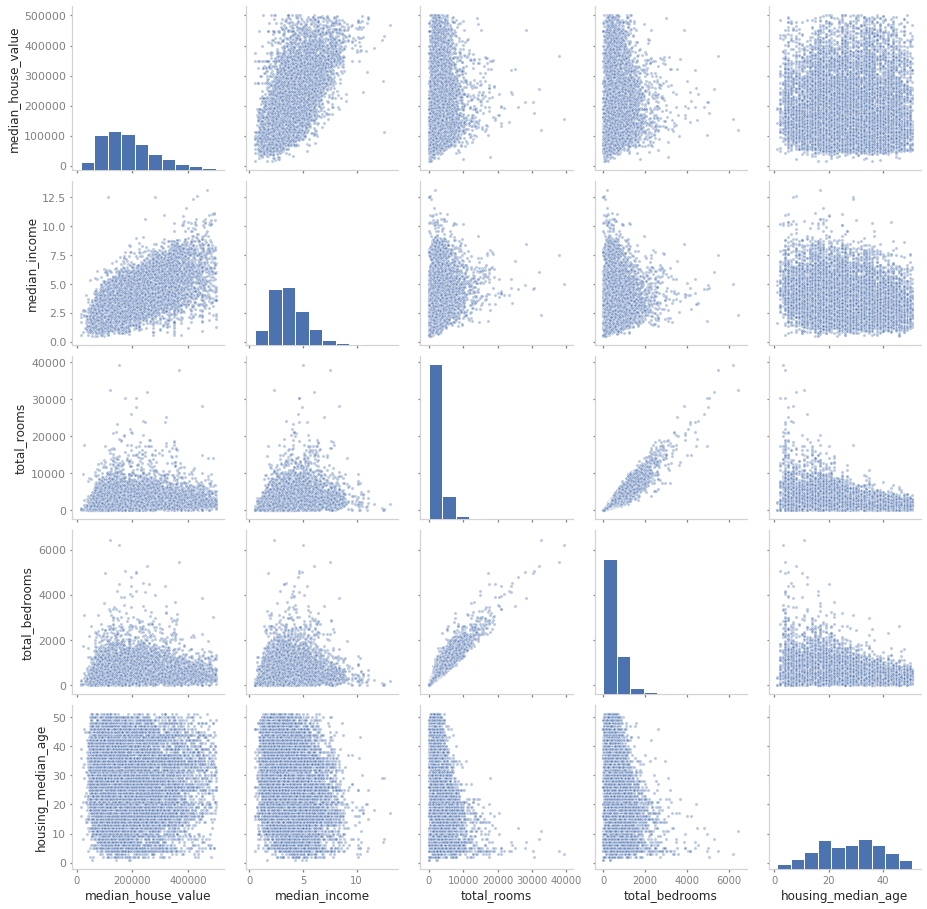

In [19]:
attr = ['median_house_value', 'median_income', 'total_rooms', 'total_bedrooms', 'housing_median_age']
scatter_kws = {'alpha':0.4, 's':10}
sns.pairplot(housing, vars=attr, diag_kind='hist', kind='scatter', plot_kws=scatter_kws)
plt.show()

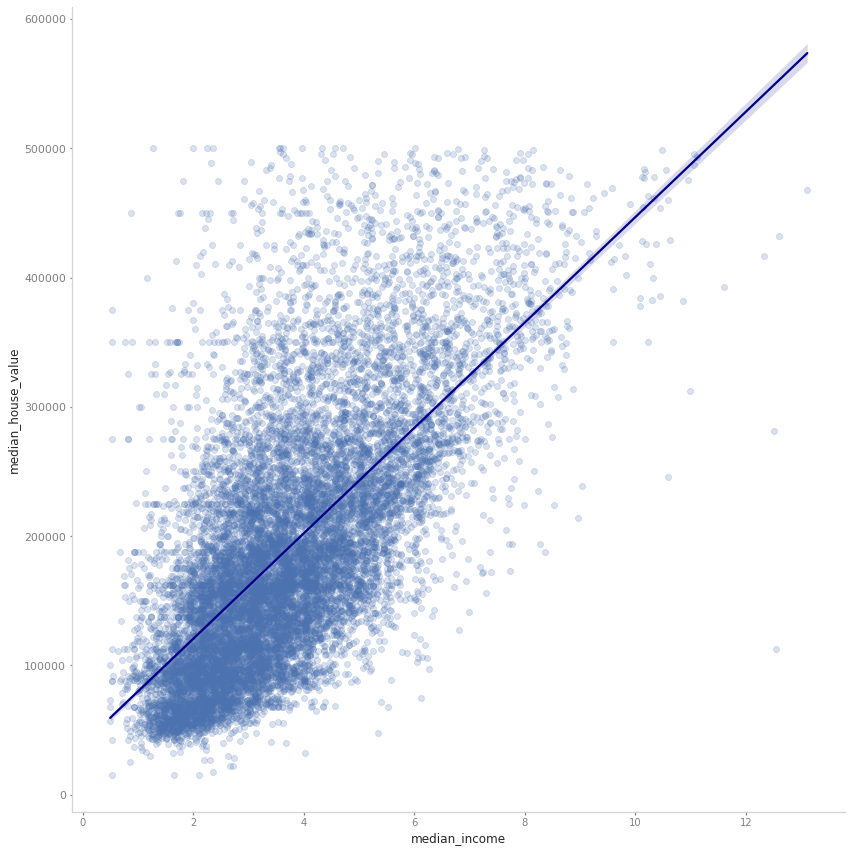

In [20]:
line_kws = {
    'color': 'darkblue'
}
sns.lmplot(x='median_income', y='median_house_value', data=housing, 
           scatter_kws={'alpha':0.2}, line_kws=line_kws, height=12)
plt.show()

### Data Cleaning

In [21]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14856 entries, 19184 to 3213
Data columns (total 10 columns):
longitude             14856 non-null float64
latitude              14856 non-null float64
housing_median_age    14856 non-null float64
total_rooms           14856 non-null float64
total_bedrooms        14698 non-null float64
population            14856 non-null float64
households            14856 non-null float64
median_income         14856 non-null float64
median_house_value    14856 non-null float64
ocean_proximity       14856 non-null object
dtypes: float64(9), object(1)
memory usage: 1.9+ MB


In [22]:
housing[housing['total_bedrooms'].isna()].head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4591,-118.28,34.06,42.0,2472.0,NaN,3795.0,1179.0,1.2254,162500.0,<1H OCEAN
16025,-122.44,37.73,39.0,1912.0,NaN,970.0,406.0,4.7813,275500.0,NEAR BAY
3529,-118.53,34.26,18.0,3674.0,NaN,1590.0,550.0,8.1760,308400.0,<1H OCEAN
16879,-122.39,37.60,34.0,707.0,NaN,381.0,156.0,4.3750,340900.0,NEAR OCEAN
9845,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,289300.0,NEAR OCEAN
4309,-118.32,34.09,44.0,2666.0,NaN,2297.0,726.0,1.6760,208800.0,<1H OCEAN
2323,-119.73,36.83,8.0,3602.0,NaN,1959.0,580.0,5.3478,138800.0,INLAND
18786,-122.42,40.44,16.0,994.0,NaN,495.0,181.0,2.1875,76400.0,INLAND
19818,-119.30,36.57,32.0,728.0,NaN,461.0,149.0,3.0156,109100.0,INLAND
3921,-118.56,34.20,35.0,2273.0,NaN,1431.0,403.0,4.0789,196700.0,<1H OCEAN


Only `total_bedrooms` seems to have missing values. We will impute those missing values with Scikit-Learn's `SimpleImputer` with `strategy='median'` later.

In [23]:
housing_labels = housing['median_house_value'].copy()
housing = housing.drop('median_house_value', axis=1)

### Experimenting with Attribute Combinations

In [24]:
housing_experimental = housing.copy()

housing_experimental['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing_experimental['rooms_per_population'] = housing['total_rooms'] / housing['population']
housing_experimental['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing_experimental['bedrooms_per_household'] = housing['total_bedrooms'] / housing['households']
housing_experimental['population_per_household'] = housing['population'] / housing['households']
housing_experimental['population_per_room'] = housing['population'] / housing['total_rooms']
housing_experimental['population_per_bedroom'] = housing['population'] / housing['total_bedrooms']

corr_series = housing_experimental.corrwith(housing_labels)
corr_series.sort_values(ascending=False)

median_income               0.665502
rooms_per_population        0.161634
total_rooms                 0.155343
rooms_per_household         0.112247
households                  0.101494
total_bedrooms              0.080235
population                  0.023737
housing_median_age          0.016297
longitude                  -0.029860
population_per_bedroom     -0.040706
population_per_household   -0.046991
bedrooms_per_household     -0.062187
population_per_room        -0.080153
latitude                   -0.165006
bedrooms_per_room          -0.235362
dtype: float64

In [25]:
np.abs(corr_series).sort_values(ascending=False)

median_income               0.665502
bedrooms_per_room           0.235362
latitude                    0.165006
rooms_per_population        0.161634
total_rooms                 0.155343
rooms_per_household         0.112247
households                  0.101494
total_bedrooms              0.080235
population_per_room         0.080153
bedrooms_per_household      0.062187
population_per_household    0.046991
population_per_bedroom      0.040706
longitude                   0.029860
population                  0.023737
housing_median_age          0.016297
dtype: float64

### Custom Transformers

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, 
                 add_bedrooms_per_room = True,
                 add_rooms_per_population = True,
                 add_rooms_per_household = True,
                 add_population_per_room = True,
                 add_bedrooms_per_household = True,
                 add_population_per_household = True,
                 add_population_per_bedroom = True):
        
        self.add_bedrooms_per_room = add_bedrooms_per_room
        self.add_rooms_per_population = add_rooms_per_population
        self.add_rooms_per_household = add_rooms_per_household
        self.add_population_per_room = add_population_per_room
        self.add_bedrooms_per_household = add_bedrooms_per_household
        self.add_population_per_household = add_population_per_household
        self.add_population_per_bedroom = add_population_per_bedroom
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy()
        
        if self.add_bedrooms_per_room:
            X_ = np.column_stack((X_, X_[:, bedrooms_ix] / X_[:, rooms_ix]))
            
        if self.add_rooms_per_population:
            X_ = np.column_stack((X_, X_[:, rooms_ix] / X_[:, population_ix]))
            
        if self.add_rooms_per_household:
            X_ = np.column_stack((X_, X_[:, rooms_ix] / X_[:, households_ix]))
            
        if self.add_population_per_room:
            X_ = np.column_stack((X_, X_[:, population_ix] / X_[:, rooms_ix]))
            
        if self.add_bedrooms_per_household:
            X_ = np.column_stack((X_, X_[:, bedrooms_ix] / X_[:, households_ix]))
            
        if self.add_population_per_household:
            X_ = np.column_stack((X_, X_[:, population_ix] / X_[:, households_ix]))
            
        if self.add_population_per_bedroom:
            X_ = np.column_stack((X_, X_[:, population_ix] / X_[:, bedrooms_ix]))
            
        return X_

### Transformation Pipelines

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_attribs = housing.columns[:-1]  # Up to 'ocean_proximity'
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),  # With default parameters
    ('standard_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('numerical', num_pipeline, num_attribs),
    ('categorical', cat_pipeline, cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

### Shortlisting Promising Models

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from time import time

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [232]:
def try_model(model, data, labels, cv=10):
    
    t0 = time()
    model.fit(data, labels)
    t1 = time() - t0
    
    predictions = model.predict(data)
    train_rmse = np.sqrt(mean_squared_error(labels, predictions))
    
    cv_scores = cross_val_score(model, data, labels, 
                                scoring='neg_mean_squared_error', cv=cv, n_jobs=4)
    
    cv_rmse_scores = np.sqrt(-cv_scores)

    print(model)
    print('Train Set RMSE: ', train_rmse)
    print('CV RMSE Mean: ', np.mean(cv_rmse_scores))
    print('CV RMSE Standard deviation: ', np.std(cv_rmse_scores))
    print('CV RMSEs: ', cv_rmse_scores)
    print('Training Duration ', t1)
    
    return model

In [ ]:
lin_reg = try_model(LinearRegression(), housing_prepared, housing_labels)

In [ ]:
tree_reg = try_model(DecisionTreeRegressor(), housing_prepared, housing_labels)

In [233]:
svm_reg = try_model(SVR(kernel='rbf'), housing_prepared, housing_labels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Train Set RMSE:  97523.42863488616
CV RMSE Mean:  97515.87142091748
CV RMSE Standard deviation:  3057.7962330851624
CV RMSEs:  [103039.99876711 100109.39412683  96117.81744762  92937.88701494
  98531.13671525  99472.45091542  99781.27062411  96910.08165196
  93969.42226255  94289.25468337]
Training Duration  10.986268520355225


In [ ]:
svm_reg = try_model(SVR(kernel='linear'), housing_prepared, housing_labels)

In [ ]:
bayes_ridge_reg = try_model(BayesianRidge(), housing_prepared, housing_labels)

In [ ]:
ridge_reg = try_model(Ridge(), housing_prepared, housing_labels)

In [ ]:
lasso_reg = try_model(Lasso(max_iter=10000), housing_prepared, housing_labels)

In [ ]:
mlp_reg = try_model(MLPRegressor(hidden_layer_sizes=(200, 200), max_iter=1000, tol=1e-100, solver='sgd', activation='tanh', learning_rate='adaptive'), 
                    housing_prepared, housing_labels)

In [ ]:
forest_reg = try_model(RandomForestRegressor(), housing_prepared, housing_labels)

### Fine-tuning your model

In [30]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import scipy
import joblib

def print_scores_params(configs):
    for mean_score, params in configs:
        print(np.sqrt(-mean_score), params)
        
        
def collect_results(configs):
    results = pd.DataFrame(configs, columns=['neg_mse', 'params'])
    results = pd.concat((results.drop('params', axis=1), 
                         results['params'].apply(pd.Series)), 
                         axis=1)
    return results

#### Support vector regression

In [ ]:
svm_reg = SVR()

In [ ]:
param_distributions = {
    'kernel': ['rbf', 'linear'],
    'C': scipy.stats.uniform(loc=0, scale=4),
    'epsilon': scipy.stats.uniform(loc=0, scale=4),
    'shrinking': [True, False]
}

randomized_search = RandomizedSearchCV(svm_reg, param_distributions, 
                                       n_iter=50, cv=10, scoring='neg_mean_squared_error',
                                       return_train_score=True, n_jobs=4)

t0 = time()
randomized_search.fit(housing_prepared, housing_labels)
t1 = time() - t0

configs = sorted(zip(randomized_search.cv_results_['mean_test_score'], 
                     randomized_search.cv_results_['params']))

svr_results = collect_results(configs)

print('Training time: ', t1)
print(randomized_search.best_params_)
print(svr_results)

scatter_kws = {'alpha':1.0, 's':25}
sns.pairplot(svr_results, diag_kind='auto', kind='scatter', plot_kws=scatter_kws, hue='kernel')
plt.show()

In [ ]:
param_grid = [
    {'kernel': ['linear'], 'C': scipy.stats.uniform(loc=4, scale=120)},
    {'kernel': ['rbf'], 'C': scipy.stats.uniform(loc=10, scale=1000)}
]
     
randomized_search = RandomizedSearchCV(svm_reg, param_grid, 
                                       n_iter=50, cv=10, scoring='neg_mean_squared_error',
                                       return_train_score=True, n_jobs=4)

t0 = time()
randomized_search.fit(housing_prepared, housing_labels)
t1 = time() - t0

configs = sorted(zip(randomized_search.cv_results_['mean_test_score'], 
                     randomized_search.cv_results_['params']))

svr_results = collect_results(configs)

print('Training time: ', t1)
print(randomized_search.best_params_)
print(svr_results)

plt.figure(figsize=(10,8))
sns.scatterplot(x='C', y='neg_mse', data=svr_results, hue='kernel', s=40) \
   .set(xscale='log')

plt.show()

In [ ]:
param_grid = [
    {'kernel': ['linear'], 'C': [10, 100, 1000, 10000, 1e5, 1e6, 1e7]},
    {'kernel': ['rbf'], 'C': [100, 1000, 10000, 1e5, 1e6, 1e7]}
]
     
grid_search = GridSearchCV(svm_reg, param_grid, 
                           cv=5, scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs=4)

t0 = time()
grid_search.fit(housing_prepared, housing_labels)
t1 = time() - t0

configs = sorted(zip(grid_search.cv_results_['mean_test_score'], 
                     grid_search.cv_results_['params']))

svr_results = collect_results(configs)

print('Training time: ', t1)
print(grid_search.best_params_)
print(svr_results)

plt.figure(figsize=(10,8))
sns.scatterplot(x='C', y='neg_mse', data=svr_results, hue='kernel', s=40) \
   .set(xscale='log')

plt.show()

In [ ]:
print_scores_params(configs)

In [ ]:
param_distributions = {
    'kernel': ['rbf'],
    'C': scipy.stats.uniform(loc=1e6, scale=2e6),
    'epsilon': scipy.stats.uniform(loc=0, scale=6),
}

randomized_search = RandomizedSearchCV(svm_reg, param_distributions, 
                                       n_iter=10, cv=5, scoring='neg_mean_squared_error',
                                       return_train_score=True, n_jobs=4)

t0 = time()
randomized_search.fit(housing_prepared, housing_labels)
t1 = time() - t0

configs = sorted(zip(randomized_search.cv_results_['mean_test_score'], 
                     randomized_search.cv_results_['params']))

svr_results = collect_results(configs)

print('Training time: ', t1)
print(randomized_search.best_params_)
print(svr_results)

plt.figure(figsize=(10,8))
sns.scatterplot(x='C', y='neg_mse', data=svr_results, s=40) \
   .set(xscale='log')

plt.show()

In [ ]:
print_scores_params(configs)

In [ ]:
joblib.dump(randomized_search.best_estimator_, f'svr-rbf-err_48429.79624209309.pkl')

#### Linear model

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()

In [ ]:
param_distributions = {
    'alpha': scipy.stats.uniform(1,10),
    'l1_ratio': scipy.stats.uniform(0,1)
}

randomized_search = RandomizedSearchCV(elastic_net, param_distributions,
                                       n_iter = 10000, scoring='neg_mean_squared_error',
                                       return_train_score=True, n_jobs=4)

t0 = time()
randomized_search.fit(housing_prepared, housing_labels)
t1 = time() - t0

configs = sorted(zip(randomized_search.cv_results_['mean_test_score'], 
                     randomized_search.cv_results_['params']))

elnet_results = collect_results(configs)

print('Training time: ', t1)
print(randomized_search.best_params_)
print(elnet_results)

plt.figure(figsize=(10,8))
sns.scatterplot(x='l1_ratio', y='neg_mse', data=elnet_results, s=40, alpha=0.3, label='l1_ratio')
sns.scatterplot(x='alpha', y='neg_mse', data=elnet_results, s=40, alpha=0.3, label='alpha')
plt.legend()
plt.show()

In [ ]:
print_scores_params(configs[-10:])

In [ ]:
joblib.dump(randomized_search.best_estimator_, f'elastic-net-err_56869.57443956936.pkl')

#### Bayesian ridge

In [ ]:
bayesian_ridge = BayesianRidge()

In [ ]:
param_distributions = {
    'n_iter': [300, 3000, 30000],
    'alpha_1': scipy.stats.uniform(0,1e-2),
    'alpha_2': scipy.stats.uniform(0,1e-2),
    'lambda_1': scipy.stats.uniform(0,1e-2),
    'lambda_2': scipy.stats.uniform(0,1e-2)
}

randomized_search = RandomizedSearchCV(bayesian_ridge, param_distributions,
                                       n_iter = 100, scoring='neg_mean_squared_error',
                                       return_train_score=True, n_jobs=4)

t0 = time()
randomized_search.fit(housing_prepared, housing_labels)
t1 = time() - t0

configs = sorted(zip(randomized_search.cv_results_['mean_test_score'], 
                     randomized_search.cv_results_['params']))

bayes_results = collect_results(configs)

print('Training time: ', t1)
print(randomized_search.best_params_)
print(bayes_results)

plt.figure(figsize=(10,8))
sns.scatterplot(x='alpha_1', y='neg_mse', data=bayes_results, s=40, alpha=0.3, label='alpha_1')
sns.scatterplot(x='alpha_2', y='neg_mse', data=bayes_results, s=40, alpha=0.3, label='alpha_2')
sns.scatterplot(x='lambda_1', y='neg_mse', data=bayes_results, s=40, alpha=0.3, label='lambda_1')
sns.scatterplot(x='lambda_2', y='neg_mse', data=bayes_results, s=40, alpha=0.3, label='lambda_2')
plt.legend()
plt.show()

In [ ]:
param_distributions = {
    'n_iter': [300, 3000, 30000],
    'alpha_1': scipy.stats.uniform(0,1),
    'alpha_2': scipy.stats.uniform(0,1),
    'lambda_1': scipy.stats.uniform(0,1),
    'lambda_2': scipy.stats.uniform(0,1)
}

randomized_search = RandomizedSearchCV(bayesian_ridge, param_distributions,
                                       n_iter = 10000, scoring='neg_mean_squared_error',
                                       return_train_score=True, n_jobs=4)

t0 = time()
randomized_search.fit(housing_prepared, housing_labels)
t1 = time() - t0

configs = sorted(zip(randomized_search.cv_results_['mean_test_score'], 
                     randomized_search.cv_results_['params']))

bayes_results = collect_results(configs)

print('Training time: ', t1)
print(randomized_search.best_params_)
print(bayes_results)

plt.figure(figsize=(10,8))
sns.scatterplot(x='alpha_1', y='neg_mse', data=bayes_results, s=40, alpha=0.5, label='alpha_1')
sns.scatterplot(x='alpha_2', y='neg_mse', data=bayes_results, s=40, alpha=0.5, label='alpha_2')
sns.scatterplot(x='lambda_1', y='neg_mse', data=bayes_results, s=40, alpha=0.5, label='lambda_1')
sns.scatterplot(x='lambda_2', y='neg_mse', data=bayes_results, s=40, alpha=0.5, label='lambda_2')
plt.legend()
plt.show()

In [ ]:
print_scores_params(configs[-10:])

In [ ]:
joblib.dump(randomized_search.best_estimator_, f'bayes-ridge-err_58815.74368822847.pkl')

#### Neural network

In [ ]:
mlp_reg = MLPRegressor()

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(100), (100,100), (100,100,100), (200), (200,200), (200,200,200)],
    'max_iter': [1000],
    'tol': [1e-100],
    'solver': ['sgd'],
    'activation': ['tanh'], 
    'learning_rate': ['adaptive']
}

grid_search = GridSearchCV(mlp_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs=4)

t0 = time()
grid_search.fit(housing_prepared, housing_labels)
t1 = time() - t0

configs = sorted(zip(grid_search.cv_results_['mean_test_score'], 
                     grid_search.cv_results_['params']))

mlp_results = collect_results(configs)

print('Training time: ', t1)
print(grid_search.best_params_)
print(mlp_results)

In [ ]:
print_scores_params(configs)

In [ ]:
param_distributions = {
    'hidden_layer_sizes': np.linspace(200, 500, num=50, endpoint=True, dtype=np.int32),
    'max_iter': [1000],
    'tol': [1e-100],
    'solver': ['sgd'],
    'activation': ['tanh'], 
    'learning_rate': ['adaptive']
}

randomized_search = RandomizedSearchCV(mlp_reg, param_distributions,
                                       n_iter=50, scoring='neg_mean_squared_error',
                                       return_train_score=True, n_jobs=4)

t0 = time()
randomized_search.fit(housing_prepared, housing_labels)
t1 = time() - t0

configs = sorted(zip(randomized_search.cv_results_['mean_test_score'], 
                     randomized_search.cv_results_['params']))

mlp_results = collect_results(configs)

print('Training time: ', t1)
print(randomized_search.best_params_)
print(mlp_results)

In [ ]:
configs = sorted(zip(randomized_search.cv_results_['mean_test_score'], 
                     randomized_search.cv_results_['params']))

mlp_results = collect_results(configs)

print('Training time: ', t1)
print(randomized_search.best_params_)
print(mlp_results)

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='hidden_layer_sizes', y='neg_mse', data=mlp_results, s=30)
plt.show()

In [ ]:
print_scores_params(configs)

In [ ]:
param_distributions = {
    'hidden_layer_sizes': np.linspace(400, 800, num=50, endpoint=True, dtype=np.int32),
    'max_iter': [1000],
    'tol': [1e-100],
    'solver': ['sgd'],
    'activation': ['tanh'], 
    'learning_rate': ['adaptive']
}

randomized_search = RandomizedSearchCV(mlp_reg, param_distributions,
                                       n_iter=50, scoring='neg_mean_squared_error',
                                       return_train_score=True, n_jobs=4)

t0 = time()
randomized_search.fit(housing_prepared, housing_labels)
t1 = time() - t0

configs = sorted(zip(randomized_search.cv_results_['mean_test_score'], 
                     randomized_search.cv_results_['params']))

mlp_results = collect_results(configs)

print('Training time: ', t1)
print(randomized_search.best_params_)
print(mlp_results)

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='hidden_layer_sizes', y='neg_mse', data=mlp_results, s=30)
plt.show()

In [ ]:
print_scores_params(configs[-10:])

In [ ]:
param_grid = {
    'hidden_layer_sizes': [800, 1000, 1200],
    'max_iter': [1000],
    'tol': [1e-100],
    'solver': ['sgd'],
    'activation': ['tanh'], 
    'learning_rate': ['adaptive']
}

grid_search = GridSearchCV(mlp_reg, param_grid,
                          scoring='neg_mean_squared_error',
                          return_train_score=True, n_jobs=4)

t0 = time()
grid_search.fit(housing_prepared, housing_labels)
t1 = time() - t0

configs = sorted(zip(grid_search.cv_results_['mean_test_score'], 
                     grid_search.cv_results_['params']))

mlp_results = collect_results(configs)

print('Training time: ', t1)
print(grid_search.best_params_)
print(mlp_results)

In [ ]:
print_scores_params(configs)

In [ ]:
joblib.dump(grid_search.best_estimator_, f'mlp-reg-err_55708.880179243715.pkl')

#### Random forest

In [ ]:
forest_reg = RandomForestRegressor()

In [ ]:
param_distributions = [
    {'bootstrap': [False], 'n_estimators': [3, 30, 300], 'max_features':[2, 4, 6, 8, 10]},
    {'bootstrap': [True], 'n_estimators': [3, 30, 300], 'max_features':[2, 4, 6, 8, 10]}
]

randomized_search = RandomizedSearchCV(forest_reg, param_distributions, cv=5,
                                       n_iter=50, scoring='neg_mean_squared_error',
                                       return_train_score=True)

t0 = time()
randomized_search.fit(housing_prepared, housing_labels)
t1 = time() - t0

configs = sorted(zip(randomized_search.cv_results_['mean_test_score'], 
                     randomized_search.cv_results_['params']))

forest_results = collect_results(configs)

print('Training time: ', t1)
print(randomized_search.best_params_)
print(forest_results)

In [ ]:
print_scores_params(configs)

In [ ]:
param_distributions = {
    'bootstrap': [True, False], 
    'n_estimators': np.linspace(300, 400, num=10, endpoint=True, dtype=np.int16),
    'max_features': np.arange(8, 16+1, 1, dtype=np.int16)
}

randomized_search = RandomizedSearchCV(forest_reg, param_distributions, cv=5,
                                       n_iter=10, scoring='neg_mean_squared_error',
                                       return_train_score=True, n_jobs=4)

t0 = time()
randomized_search.fit(housing_prepared, housing_labels)
t1 = time() - t0

configs = sorted(zip(randomized_search.cv_results_['mean_test_score'], 
                     randomized_search.cv_results_['params']))

forest_results = collect_results(configs)

print('Training time: ', t1)
print(randomized_search.best_params_)
print(forest_results)

In [ ]:
print_scores_params(configs)

In [ ]:
param_grid = {
    'bootstrap': [False], 
    'n_estimators': [340, 350, 360, 370, 380],
    'max_features': [8,9,10]
}

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs=4)

t0 = time()
grid_search.fit(housing_prepared, housing_labels)
t1 = time() - t0

configs = sorted(zip(grid_search.cv_results_['mean_test_score'], 
                     grid_search.cv_results_['params']))

forest_results = collect_results(configs)

print('Training time: ', t1)
print(grid_search.best_params_)
print(forest_results)

In [ ]:
print_scores_params(configs)

In [ ]:
joblib.dump(grid_search.best_estimator_, f'rforest_reg-err_43996.72651130414.pkl')

### Evaluating feature importances

In [31]:
rforest_model = joblib.load('models/initial/rforest_reg-err_43996.72651130414.pkl')
elastic_net_model = joblib.load('models/initial/elastic-net-err_56869.57443956936.pkl')

In [32]:
rforest_model.feature_importances_

array([7.59313847e-02, 6.89681802e-02, 3.28467472e-02, 1.28419617e-02,
       1.28872822e-02, 1.29153722e-02, 1.28097721e-02, 2.94243982e-01,
       6.15642653e-02, 5.09300068e-02, 2.45449746e-02, 5.03307118e-02,
       1.62242114e-02, 4.81002610e-02, 3.06469467e-02, 1.96957932e-02,
       1.64905983e-01, 1.06574723e-04, 2.78914349e-03, 6.71644572e-03])

In [33]:
# extra_attribs = ['bedrooms_per_room', 'rooms_per_population', 'rooms_per_household',
#                  'population_per_room', 'bedrooms_per_household', 'population_per_household',
#                  'population_per_bedroom']

extra_num_attribs = [attrib.split('add_')[1] for attrib in num_pipeline.get_params().keys() 
                     if attrib.startswith('attribs_adder__')]
extra_cat_attibs = list(full_pipeline.named_transformers_['categorical'] \
                                     .named_steps['one_hot_encoder'].categories_[0])

attributes = list(num_attribs) + extra_num_attribs + extra_cat_attibs

In [35]:
rforest_attrib_importances = sorted(zip(rforest_model.feature_importances_, attributes), reverse=True)
elastic_net_attrib_importances = sorted(zip(np.abs(elastic_net_model.coef_), attributes), reverse=True)

In [36]:
rforest_attrib_importances

[(0.29424398179003025, 'median_income'),
 (0.164905983271642, 'INLAND'),
 (0.07593138474413219, 'longitude'),
 (0.06896818018741933, 'latitude'),
 (0.06156426528932664, 'bedrooms_per_household'),
 (0.05093000679992595, 'bedrooms_per_room'),
 (0.050330711809723996, 'population_per_household'),
 (0.04810026101190833, 'rooms_per_household'),
 (0.03284674718911408, 'housing_median_age'),
 (0.03064694673105664, 'rooms_per_population'),
 (0.024544974592777054, 'population_per_bedroom'),
 (0.019695793157428972, '<1H OCEAN'),
 (0.01622421140272565, 'population_per_room'),
 (0.012915372169270894, 'population'),
 (0.012887282176055082, 'total_bedrooms'),
 (0.012841961666373395, 'total_rooms'),
 (0.012809772079996585, 'households'),
 (0.006716445716161223, 'NEAR OCEAN'),
 (0.002789143492411171, 'NEAR BAY'),
 (0.0001065747225205981, 'ISLAND')]

In [37]:
elastic_net_attrib_importances

[(60557.37369202056, 'median_income'),
 (39719.88291662661, 'longitude'),
 (39635.51639399722, 'latitude'),
 (39410.22897298141, 'bedrooms_per_room'),
 (27585.628439396398, 'INLAND'),
 (26797.861037732444, 'population_per_room'),
 (20011.36044224841, 'bedrooms_per_household'),
 (14699.060254482969, 'NEAR OCEAN'),
 (14037.246993795497, 'households'),
 (13072.955840229164, '<1H OCEAN'),
 (11216.901932981184, 'population'),
 (8584.676699114583, 'housing_median_age'),
 (6657.635780403597, 'rooms_per_household'),
 (5032.10235574695, 'total_bedrooms'),
 (4817.819464194946, 'population_per_bedroom'),
 (4176.277109469981, 'rooms_per_population'),
 (3299.6347432234893, 'total_rooms'),
 (2754.601638197447, 'NEAR BAY'),
 (2451.761586235846, 'population_per_household'),
 (2201.1118032902536, 'ISLAND')]

### Evaluating your system on the test set

In [38]:
# Random forest and Elastic net were loaded above
svr_model = joblib.load('models/initial/svr-rbf-err_48429.79624209309.pkl')
mlp_model = joblib.load('models/initial/mlp-reg-err_55708.880179243715.pkl')

In [39]:
X_test = housing_test.drop('median_house_value', axis=1)
y_test = housing_test['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

In [40]:
ci = 0.95

In [213]:
y_predicted = rforest_model.predict(X_test_prepared)
print(np.sqrt(mean_squared_error(y_test, y_predicted)))

squared_errors = (y_predicted - y_test)**2
print(np.sqrt(scipy.stats.t.interval(ci, len(squared_errors) - 1,
                                     loc=squared_errors.mean(), scale=scipy.stats.sem(squared_errors))))

43569.06416824148
[41640.9354919  45415.40703718]


In [215]:
y_predicted = elastic_net.predict(X_test_prepared)
print(np.sqrt(mean_squared_error(y_test, y_predicted)))

squared_errors = (y_predicted - y_test)**2
print(np.sqrt(scipy.stats.t.interval(ci, len(squared_errors) - 1,
                                     loc=squared_errors.mean(), scale=scipy.stats.sem(squared_errors))))

60001.851597173045
[53970.53756409 65479.96231842]


In [216]:
y_predicted = mlp_model.predict(X_test_prepared)
print(np.sqrt(mean_squared_error(y_test, y_predicted)))

squared_errors = (y_predicted - y_test)**2
print(np.sqrt(scipy.stats.t.interval(ci, len(squared_errors) - 1,
                                     loc=squared_errors.mean(), scale=scipy.stats.sem(squared_errors))))

55239.215447608476
[53149.13993198 57253.04158755]


In [217]:
y_predicted = svr_model.predict(X_test_prepared)
print(np.sqrt(mean_squared_error(y_test, y_predicted)))

squared_errors = (y_predicted - y_test)**2
print(np.sqrt(scipy.stats.t.interval(ci, len(squared_errors) - 1,
                                     loc=squared_errors.mean(), scale=scipy.stats.sem(squared_errors))))

47600.58553636437
[45518.72336602 49595.13393406]


### Re-evaluating the models based on only the most important attributes

In [46]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_intices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_intices_]

In [220]:
k = 5
top_k_feature_indices = indices_of_top_k(rforest_model.feature_importances_, k)
top_k_feature_indices

array([ 0,  1,  7,  8, 16])

In [222]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'bedrooms_per_household',
       'INLAND'], dtype='<U24')

In [224]:
sorted(zip(rforest_model.feature_importances_, attributes), reverse=True)[:k]

[(0.29424398179003025, 'median_income'),
 (0.164905983271642, 'INLAND'),
 (0.07593138474413219, 'longitude'),
 (0.06896818018741933, 'latitude'),
 (0.06156426528932664, 'bedrooms_per_household')]

In [225]:
prep_and_feat_selection = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(rforest_model.feature_importances_, k))
])

In [227]:
housing_prepared_top_k_features = prep_and_feat_selection.fit_transform(housing)

In [228]:
housing_prepared_top_k_features[:5]

array([[-1.56789089,  1.32212996, -0.15048514, -0.31315651,  0.        ],
       [ 0.71516739, -0.74542403,  0.54560499, -0.68110493,  0.        ],
       [ 1.08307744, -0.68023089, -1.31006149,  0.51763515,  1.        ],
       [-0.91774847,  1.12655053,  0.19249084, -0.39918717,  1.        ],
       [ 0.91676194, -0.97360004,  0.49803851, -0.62263324,  0.        ]])

In [230]:
housing_prepared[:5, top_k_feature_indices]

array([[-1.56789089,  1.32212996, -0.15048514, -0.31315651,  0.        ],
       [ 0.71516739, -0.74542403,  0.54560499, -0.68110493,  0.        ],
       [ 1.08307744, -0.68023089, -1.31006149,  0.51763515,  1.        ],
       [-0.91774847,  1.12655053,  0.19249084, -0.39918717,  1.        ],
       [ 0.91676194, -0.97360004,  0.49803851, -0.62263324,  0.        ]])

In [248]:
prep_select_predict = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(rforest_model.feature_importances_, k=10)),
    ('svm_reg', SVR(**svr_model.get_params()))
])

In [249]:
prep_select_predict.fit(housing, housing_labels)

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                        

In [250]:
y_predicted = prep_select_predict.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_predicted)))

squared_errors = (y_predicted - y_test)**2
print(np.sqrt(scipy.stats.t.interval(ci, len(squared_errors) - 1,
                                     loc=squared_errors.mean(), scale=scipy.stats.sem(squared_errors))))

47887.46206242069
[45708.51883333 49971.48538539]


In [254]:
param_grid = [{
    'preparation__numerical__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(rforest_model.feature_importances_) + 1))
}]

grid_search_prep = GridSearchCV(prep_select_predict, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 78.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preparation',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numerical',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                               

In [255]:
grid_search_prep.best_params_

{'feature_selection__k': 12,
 'preparation__numerical__imputer__strategy': 'mean'}

In [256]:
y_predicted = grid_search_prep.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_predicted)))

squared_errors = (y_predicted - y_test)**2
print(np.sqrt(scipy.stats.t.interval(ci, len(squared_errors) - 1,
                                     loc=squared_errors.mean(), scale=scipy.stats.sem(squared_errors))))

47155.348704668584
[44972.60379609 49241.4330693 ]


In [43]:
prep_select_predict = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(rforest_model.feature_importances_, k=12)),
    ('rforest_reg', RandomForestRegressor(**rforest_model.get_params()))
])

In [47]:
prep_select_predict.fit(housing, housing_labels)

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                        

In [48]:
y_predicted = prep_select_predict.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_predicted)))

squared_errors = (y_predicted - y_test)**2
print(np.sqrt(scipy.stats.t.interval(ci, len(squared_errors) - 1,
                                     loc=squared_errors.mean(), scale=scipy.stats.sem(squared_errors))))

44288.47108961502
[42333.41622747 46160.79736555]


In [49]:
param_grid = [{
    'preparation__numerical__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(rforest_model.feature_importances_) + 1))
}]

grid_search_prep = GridSearchCV(prep_select_predict, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 25.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preparation',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('numerical',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                               

In [50]:
grid_search_prep.best_params_

{'feature_selection__k': 20,
 'preparation__numerical__imputer__strategy': 'mean'}

In [55]:
y_predicted = grid_search_prep.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_predicted)))

squared_errors = (y_predicted - y_test)**2
print(np.sqrt(scipy.stats.t.interval(ci, len(squared_errors) - 1,
                                     loc=squared_errors.mean(), scale=scipy.stats.sem(squared_errors))))

43597.50445338555
[41657.01992338 45455.22500471]
